In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df_AF = pd.read_excel(r"Original Data\Sistematización_AF_Monitoreo 6.xlsx")
coords = pd.read_excel(r"Original Data\Modulos de campo.xlsx",'Encenillo')

In [2]:
coords

,NOMBRE,ID_MUEST,COOR_ESTE,COOR_NORTE
0,Comp. Aprov Forestal - Arreglo 1,CAF-N1-1,-73.910047,4.793035
1,Comp. Aprov Forestal - Arreglo 1,CAF-N1-2,-73.910047,4.793082
2,Comp. Aprov Forestal - Arreglo 1,CAF-N1-3,-73.910006,4.793059
3,Comp. Aprov Forestal - Arreglo 1,CAF-N1-4,-73.910006,4.793011
4,Comp. Aprov Forestal - Arreglo 1,CAF-N1-5,-73.910047,4.792988
...,...,...,...,...
465,Comp. Aprov Forestal - Transecto 9,CAF-T9,-73.909989,4.791678
466,Comp. Aprov Forestal - Transecto 8,CAF-T8,-73.909864,4.791435
467,Comp. Aprov Forestal - Transecto 6,CAF-T6,-73.909936,4.791071
468,Comp. Aprov Forestal - Transecto 5,CAF-T5,-73.910215,4.790874


In [3]:
#Select the values in coords that belong to modules.
sel = coords[coords['ID_MUEST'].str.match('CAF-N')]
sel

,NOMBRE,ID_MUEST,COOR_ESTE,COOR_NORTE
0,Comp. Aprov Forestal - Arreglo 1,CAF-N1-1,-73.910047,4.793035
1,Comp. Aprov Forestal - Arreglo 1,CAF-N1-2,-73.910047,4.793082
2,Comp. Aprov Forestal - Arreglo 1,CAF-N1-3,-73.910006,4.793059
3,Comp. Aprov Forestal - Arreglo 1,CAF-N1-4,-73.910006,4.793011
4,Comp. Aprov Forestal - Arreglo 1,CAF-N1-5,-73.910047,4.792988
...,...,...,...,...
388,Comp. Aprov Forestal - Arreglo 57,CAF-N57-3,-73.910296,4.792427
389,Comp. Aprov Forestal - Arreglo 57,CAF-N57-4,-73.910296,4.792380
390,Comp. Aprov Forestal - Arreglo 57,CAF-N57-5,-73.910337,4.792357
391,Comp. Aprov Forestal - Arreglo 57,CAF-N57-6,-73.910377,4.792380


In [4]:
mods = sel['ID_MUEST'].str[5:-2]
mods

0       1
1       1
2       1
3       1
4       1
       ..
388    57
389    57
390    57
391    57
392    57
Name: ID_MUEST, Length: 393, dtype: object

In [5]:
sel['No_Mod'] = mods
sel

<ipython-input-5-0272460d76c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel['No_Mod'] = mods


,NOMBRE,ID_MUEST,COOR_ESTE,COOR_NORTE,No_Mod
0,Comp. Aprov Forestal - Arreglo 1,CAF-N1-1,-73.910047,4.793035,1
1,Comp. Aprov Forestal - Arreglo 1,CAF-N1-2,-73.910047,4.793082,1
2,Comp. Aprov Forestal - Arreglo 1,CAF-N1-3,-73.910006,4.793059,1
3,Comp. Aprov Forestal - Arreglo 1,CAF-N1-4,-73.910006,4.793011,1
4,Comp. Aprov Forestal - Arreglo 1,CAF-N1-5,-73.910047,4.792988,1
...,...,...,...,...,...
388,Comp. Aprov Forestal - Arreglo 57,CAF-N57-3,-73.910296,4.792427,57
389,Comp. Aprov Forestal - Arreglo 57,CAF-N57-4,-73.910296,4.792380,57
390,Comp. Aprov Forestal - Arreglo 57,CAF-N57-5,-73.910337,4.792357,57
391,Comp. Aprov Forestal - Arreglo 57,CAF-N57-6,-73.910377,4.792380,57


In [59]:
#Squash coordinates into averages.
mask = sel.groupby(['No_Mod']).mean()
mask.reset_index(level=0,inplace=True)
mask['No_Mod'] = mask['No_Mod'].astype('int64')
mask

,No_Mod,COOR_ESTE,COOR_NORTE
0,1,-73.910047,4.793035
1,10,-73.909950,4.792362
2,11,-73.909673,4.792434
3,12,-73.909547,4.792267
4,13,-73.909824,4.792175
5,14,-73.909731,4.791990
6,15,-73.909486,4.791552
7,16,-73.909415,4.791411
8,17,-73.909428,4.791240
9,18,-73.909707,4.790889


In [6]:
#Join tables so that coordinates match locations
coordinated = df_AF.merge(mask,how='outer', on='No_Mod')
coordinated.columns

NameError: name 'mask' is not defined

In [119]:
#Group by coordinates
x = coordinated.groupby(['COOR_ESTE']).mean()
y = coordinated.groupby(['COOR_NORTE']).mean()
xy = coordinated.groupby(['COOR_NORTE','COOR_ESTE']).mean()


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not <FloatingArray>
[1899.6236363636363,  2730.835664335664, 1518.2722419928825,
 2039.7824733096086, 3262.4856630824374, 1834.7636363636364,
     1980.404296875,  591.5348432055749,  2023.719298245614,
 1215.6141304347825, 1838.8602150537633,  520.2341549295775,
 2513.3839285714284,  1046.992214532872,  1534.782028469751,
 2186.2952029520297,        3273.484375,  908.0742957746479,
 1792.7028985507247,   888.487235915493,  1150.190693430657,
  483.7368421052632,   2278.23851590106,  871.0871886120997,
  962.4345454545454, 1381.0775261324043, 1064.9973498233217,
  868.6341240875912,  1602.551948051948, 1100.8690909090908,
 1614.4781818181818,  2196.824912891986, 1146.4438405797102,
  1393.185763888889,  794.3003533568905, 1214.8718411552347,
  1265.352490421456,  1691.654255319149,  1199.346654275093,
 1302.5873226950355, 1619.3511029411766,  966.7937272727273,
               <NA>, 1344.0991134751773, 1085.2918149466193,
  917.1039426523297, 1481.3784965034965, 1891.9372413793105,
  1572.513986013986,  984.5470383275261,  944.9845950704225,
 2013.4700704225352,  712.8808620689656, 1526.0879790940767,
  1203.170051724138,  1163.130565068493, 1938.7248293515358]
Length: 57, dtype: Float64

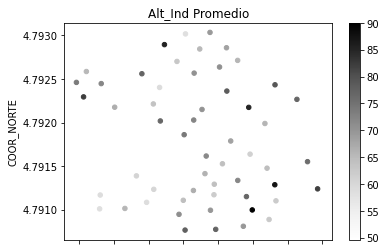

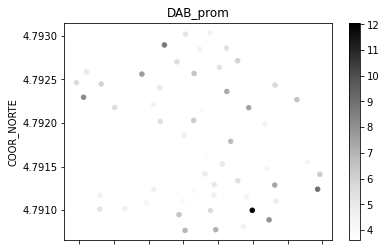

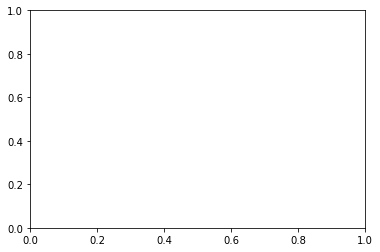

In [120]:
#Plot coordinates to different values. Generate one of these each for mortality, height, DAB, health.
valores = ['Alt_Ind Promedio', 'DAB_prom', 'Area_cop_ind', 'Sup_Ind','Est_Fit_Ind']
for valor in valores:
    
    mask.plot(kind='scatter', x='COOR_ESTE', y='COOR_NORTE', c=xy[valor].array, colorbar=True, title=valor)


In [45]:
sf = df_AF.drop(labels = 'Fecha', axis = 1)

In [47]:
sf.dtypes

ID                        Int64
Even_mon                 string
Especie                  string
No_Mod                    Int64
No_Ind                    Int64
Alt1_Ind                float64
Alt2_Ind                Float64
Alt3_Ind                Float64
Alt_Ind Promedio        float64
DAB1_Ind                float64
DAB2_Ind                Float64
DAB3_Ind                float64
DAB_prom                float64
Diam_1_Ind              Float64
Diam_2_Ind              Float64
Area_cop_ind            Float64
Observaciones_Crec       string
Sup_Ind                  string
Est_Fit_Ind               Int64
Coloracion               string
Vigor bajo               string
Herbivoria               string
Patogenos                string
Competencia              string
Daño mecanico            string
Anegamiento              string
Planta no encontrada     string
Daño por Curi            string
Rebrotando               string
Observaciones_Sup        string
dtype: object

In [23]:
#Get rid of 'Object' dtypes.
df_AF = df_AF.convert_dtypes()
keys = ['Alt1_Ind','Alt_Ind Promedio','DAB1_Ind','DAB3_Ind','DAB_prom']
for item in keys:
    df_AF[item] = pd.to_numeric(df_AF[item], errors='coerce')

In [32]:
grup = df_AF.groupby(['No_Mod']).mean()
grup2 = df_AF.groupby(['Even_mon','Especie','No_Mod']).mean()
grup2

ID  No_Ind   Alt1_Ind  Alt2_Ind  \
Even_mon Especie               No_Mod                                        
T1       Ageratina asclepiadea 5        239.0   239.0  57.000000       0.0   
                               9        438.0   438.0  23.714286       0.0   
                               12       585.0   585.0  20.428571       0.0   
                               19       928.0   928.0  43.714286       0.0   
                               23      1124.0  1124.0  40.428571       0.0   
...                                       ...     ...        ...       ...   
T6       Viburnum tinoides     55      2675.0  2675.0  84.250000      <NA>   
                               56      2741.5  2741.5  97.333333      <NA>   
         Weinmannia sp         8        373.0   373.0  73.000000      <NA>   
                               10       476.0   476.0  33.000000      <NA>   
                               14       669.5   669.5  76.166667      <NA>   

                                       Alt3_Ind  Alt_Ind Promedio   DAB1_Ind  \
Even_mon Especie               No_Mod                                          
T1       Ageratina asclepiadea 5            0.0         57.000000   0.600000   
                               9            0.0         23.714286   0.385714   
                               12           0.0         20.428571   0.357143   
                               19           0.0         43.714286   0.435714   
                               23           0.0         40.428571   0.414286   
...                                         ...               ...        ...   
T6       Viburnum tinoides     55          <NA>         67.400000   6.000000   
                               56          <NA>         97.333333   6.833333   
         Weinmannia sp         8           <NA>         73.000000   8.500000   
                               10          <NA>         33.000000   4.000000   
                               14          <NA>         76.166667  13.500000   

                                       DAB2_Ind  DAB3_Ind   DAB_prom  \
Even_mon Especie               No_Mod                                  
T1       Ageratina asclepiadea 5            0.0       0.0   0.600000   
                               9            0.0       0.0   0.385714   
                               12           0.0       0.0   0.357143   
                               19           0.0       0.0   0.435714   
                               23           0.0       0.0   0.414286   
...                                         ...       ...        ...   
T6       Viburnum tinoides     55          <NA>       NaN   4.800000   
                               56          <NA>       NaN   6.833333   
         Weinmannia sp         8           <NA>       NaN   8.500000   
                               10          <NA>       NaN   4.000000   
                               14          <NA>       NaN  13.500000   

                                       Diam_1_Ind  Diam_2_Ind  Area_cop_ind  \
Even_mon Especie               No_Mod                                         
T1       Ageratina asclepiadea 5             25.0        17.0         212.5   
                               9        15.857143   13.142857    111.571429   
                               12             8.0    6.428571     25.714286   
                               19       21.285714   13.428571    143.857143   
                               23       21.428571   17.857143    205.714286   
...                                           ...         ...           ...   
T6       Viburnum tinoides     55            17.0   15.666667          80.8   
                               56            23.0        20.5    243.916667   
         Weinmannia sp         8             22.5        23.5         355.0   
                               10            15.0        14.0         105.0   
                               14            40.5   34.666667    712.916667   

                      

In [38]:
eventos = df_AF['Even_mon'].unique()


<StringArray>
['T1', 'T2', 'T3', 'T4', 'T5', 'T6']
Length: 6, dtype: string

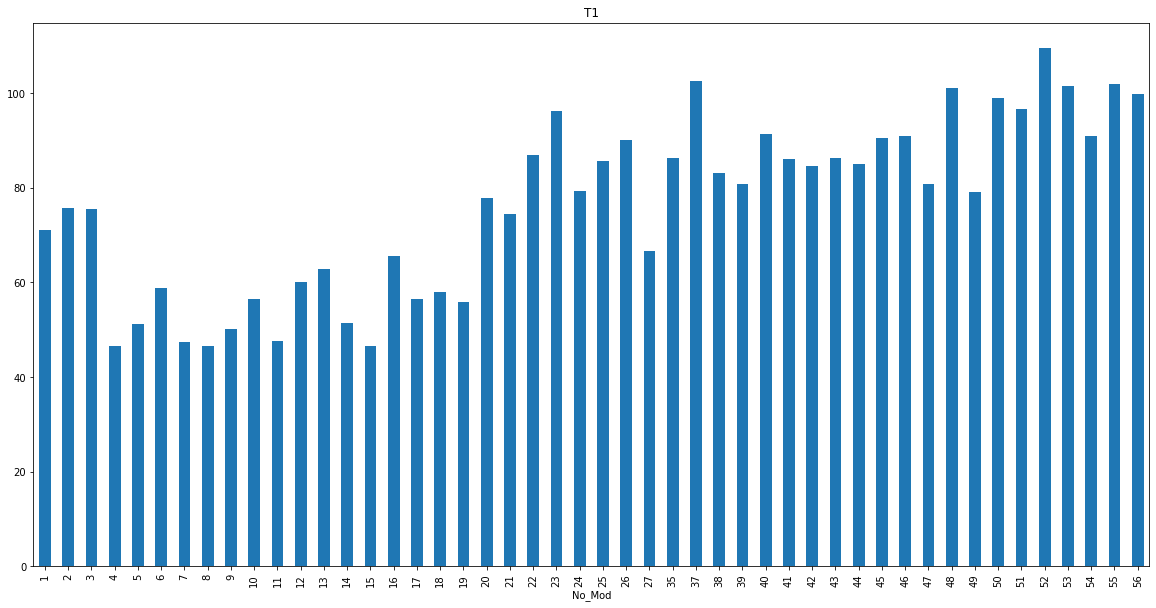

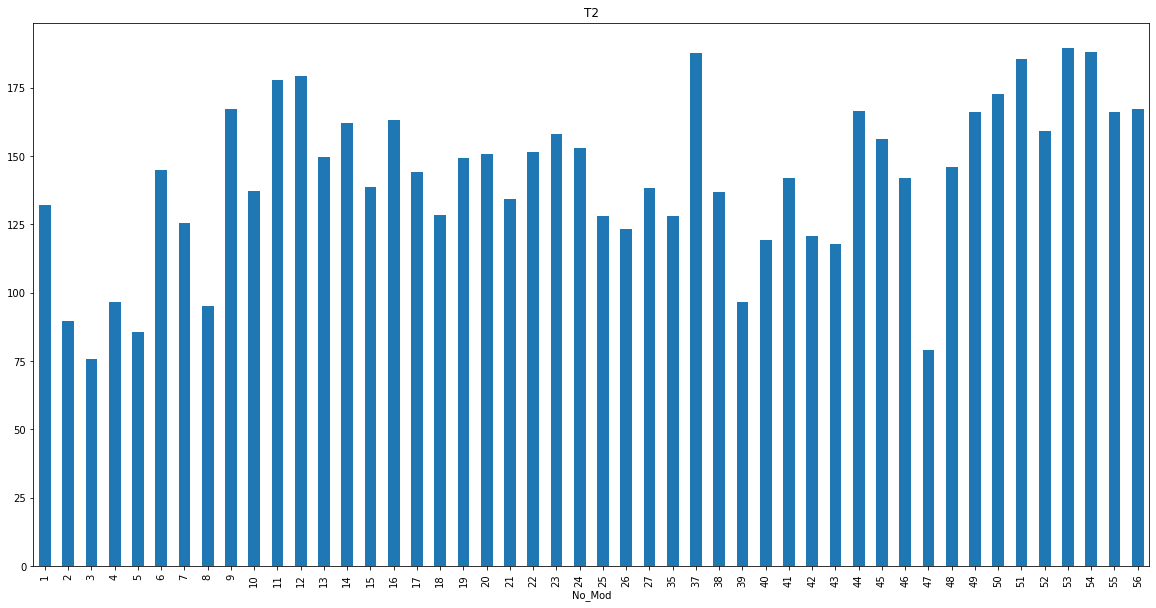

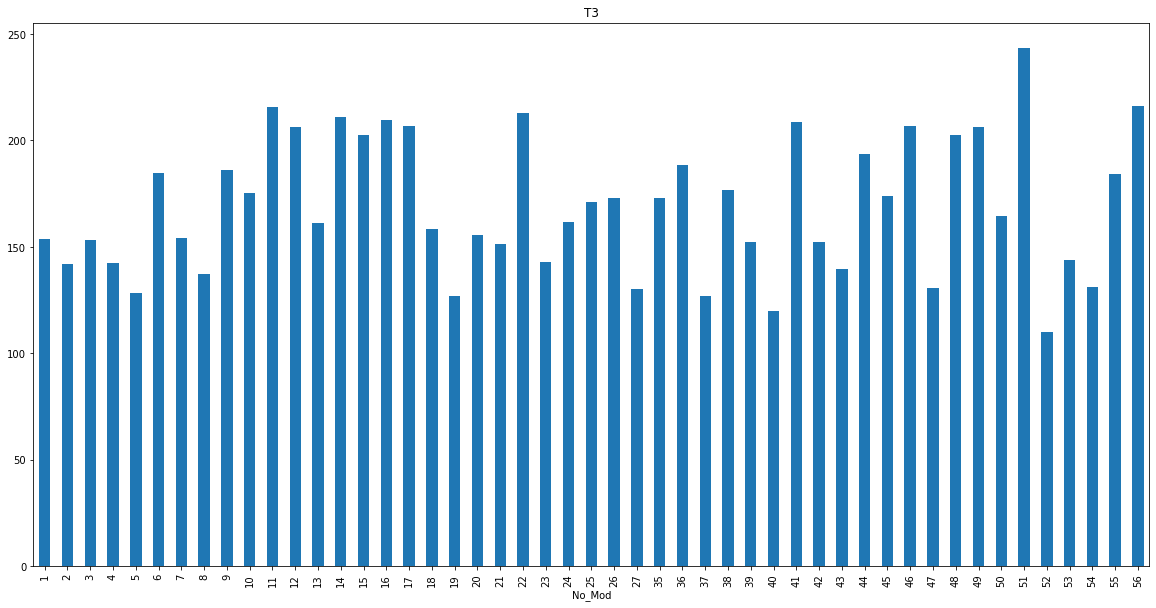

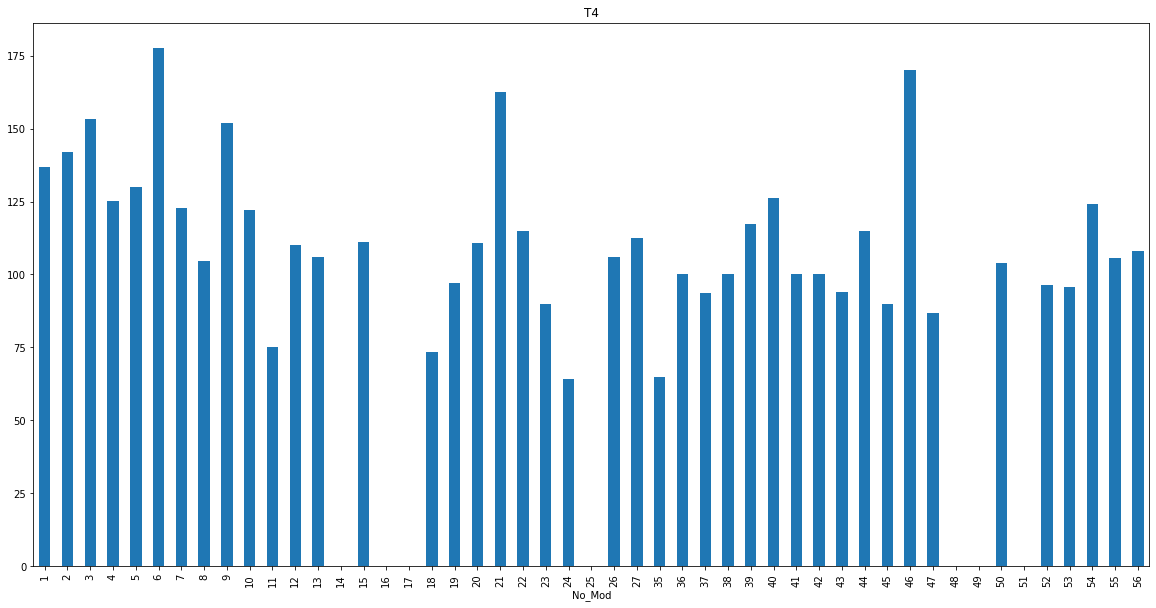

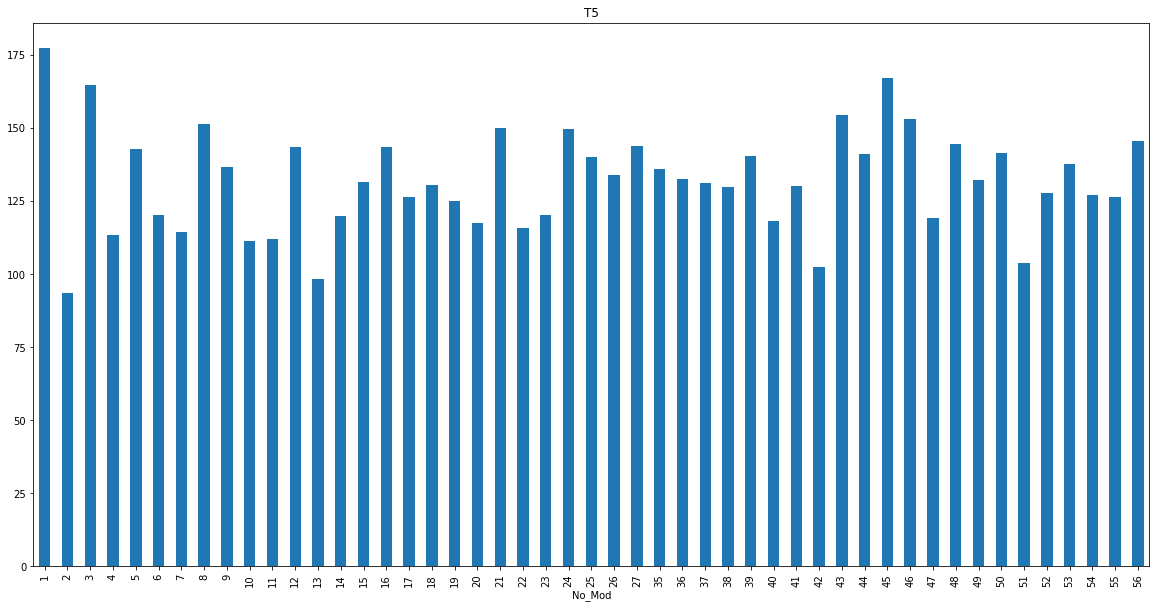

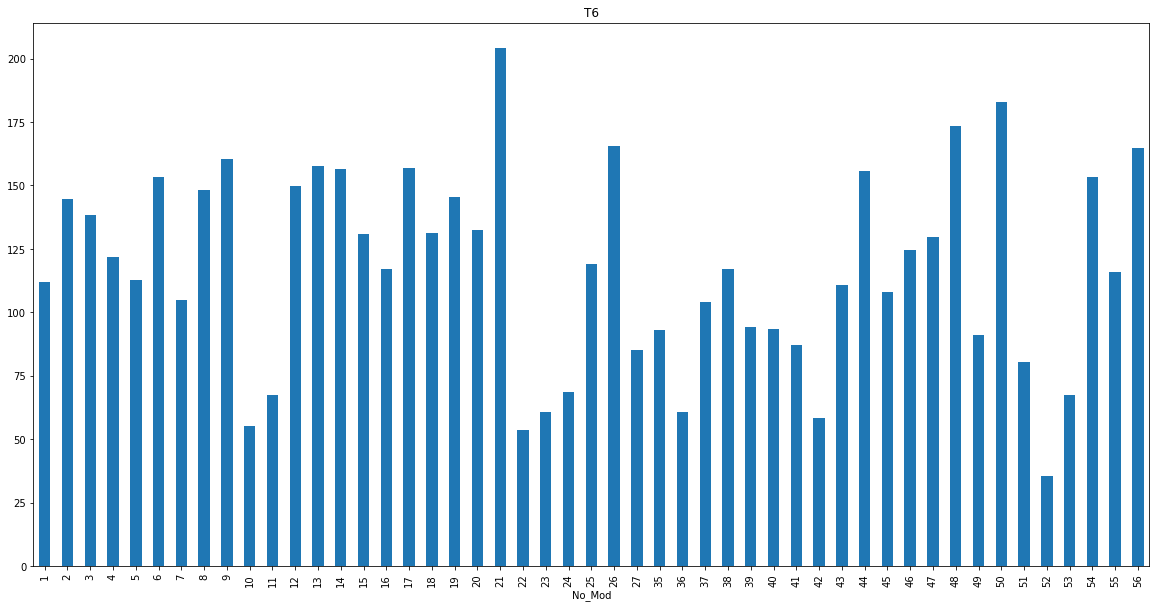

In [39]:
for item in eventos:
    
    plt.figure(figsize=(20,10))
    plt.title(label=item)
    grup2.loc[item].loc['Lupinus bogotensis']['Alt_Ind Promedio'].plot(kind='bar');

In [6]:
#Save any modifications to the data
writer = pd.ExcelWriter('Encenillo.xlsx', engine='openpyxl')
cwriter = pd.ExcelWriter('Coords.xlsx', engine='openpyxl')
df_AF.to_excel(writer, index=False, engine='openpyxl')
coords.to_excel(cwriter, index=False, sheet_name='Encenillo', engine='openpyxl')